## 2D hydrodynamics with LAX methods

@author Sayantan 

Date:  3 April 2023

### 1.1 Equations

The hydrostatic system with self-gravity-- 

For an isothermal gas, the dynamics is governed by continuity eqution and momentum equation. They are given as follows,

The mass-continuity equation
$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \nabla.(\rho \vec v) =0
\end{equation}\tag{1}
$$
The momentum equation 
$$
\begin{eqnarray}
\rho \frac{d \vec v}{ d t} = - \nabla P + \rho \vec g \\
\rho \left[\frac{\partial v}{\partial t}+ (\vec v . \nabla)\vec v \right] = - \nabla P + \rho \vec g
\end{eqnarray}\tag{3}
$$
The self-gravity is 
$$
\begin{equation}
\nabla. \vec g = -4\pi G\rho
\end{equation}\tag{3}
$$

where
$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation}\tag{4}
$$
is Poisson's equation and  

$$
\begin{equation}
\nabla \phi =  - \vec g 
\end{equation}\tag{5}
$$

<!-- For simplicity, we consider only 1-D. Later in the paper, we will implement 2D using PINNS.
$$
\begin{eqnarray}
    \frac{\partial \rho_1}{\partial t} + \rho_0 \frac{\partial v_1} {\partial x}  = 0 \\
    \rho_0 \frac{\partial v_1}{\partial t} = - c_s^{2} \frac{\partial \rho_1}{\partial x}  + \rho g_{1} \\
    % P_{1} = \gamma \frac{P_{0}}{\rho_0} \rho_1\\
    \frac{\partial g_1}{\partial x} = - 4 \pi G \rho_1
\end{eqnarray}\tag{6}
$$

#### The initial conditions is derivered using linear analysis (refer to the paper)

$$
\begin{eqnarray}
\rho(x,t=0) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{7}
$$

When self-gravity is active and $\lambda> \lambda_{J}$ 

$$
\begin{eqnarray}
v_{x}(x,t=0) &=& -v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{8}
$$

where $v_1 = \frac{\alpha}{k} \frac{\rho_1}{\rho}$ and 
$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}\tag{9}
$$
however for $\lambda < \lambda_{J}$  and for non self-gravitating system 

$$
\begin{eqnarray}
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right)
\end{eqnarray}\tag{10}
$$

#### Considering Periodic Boundary Conditions


$$
\begin{eqnarray}
\rho(x=0,t) &=& \rho (x=xmax,t)\\
v_{x}(x=t,t) &=& v_{x}(x
\end{eqnarray}\tag{11}
$$

<!-- $$
\begin{eqnarray}
=xmax,t)
\end{eqnarray}\tag{12}
$$ -->

 -->


### 1.3 LAX Method

Here the Lax method is used to integrate the flux conservative form of the continuity and momentum equations. For an equation of the form 

$$
\begin{equation}
\frac{\partial f}{\partial t} = -\frac{\partial }{\partial x}\left(fv_x\right) - \frac{\partial }{\partial y}\left(fv_y\right)
\end{equation}\tag{6}
$$

the Lax method is the finite-difference approximation in 2D,

$$
\begin{equation}
\frac{f^{n+1}_{i,j}-\left( f^{n}_{i+1,j} + f^{n}_{i-1,j}+f^{n}_{i,j+1} + f^{n}_{i,j-1}\right)/4}{\Delta t}=-\frac{f^{n}_{i+1,j}v^{n}_{x,i+1,j}-f^{n}_{i-1,j}v^{n}_{x,i-1,j}}{2\Delta x} - -\frac{f^{n}_{i,j+1}v^{n}_{y,i,j+1}-f^{n}_{i,j-1}v^{n}_{y,i,j-1}}{2\Delta y}
\end{equation}\tag{7}
$$
Forward Time Centered Space (FTCS) method is unconditionally unstable . But the Lax method is conditionally stable if,

$$
\begin{equation}
\nu \equiv \frac{c\Delta t}{\Delta x} \leq 1
\end{equation}\tag{8}
$$

Where $\nu$ is known as Courant number. Physically it means that the signal cannot travel more than $\Delta x$ in $\Delta t$ time.

The continuity equation in 2D

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right) - \frac{\partial}{\partial y}\left(\rho v_{y}\right)\\
\end{eqnarray}\tag{9}
$$

The momemtum equation accumulating the components along x-axis (i vector)

$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t}+\rho v_{x}\frac{\partial v_{x}}{\partial x} + \rho v_{y}\frac{\partial v_{x}}{\partial y}&=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} +\frac{\partial\rho v_{x} v_{x}}{\partial x} - v_{x}\frac{\partial\rho v_{x}}{\partial x} +\frac{\partial\rho v_{y} v_{x}}{\partial y} - v_{x}\frac{\partial\rho v_{y}}{\partial y}&=& -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x} \nonumber\\
\Rightarrow \rho\frac{\partial v_{x}}{\partial t} - v_{x}\frac{\partial \rho v_{x}}{\partial x} - v_{x}\frac{\partial\rho v_{y}}{\partial y} &=&-\frac{\partial \rho v_{x} v_{x}}{\partial x}- \frac{\partial\rho v_{y} v_{x}}{\partial y}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x}
\end{eqnarray}\tag{10}
$$

Now substituting equation (9) to the seconds term in the last eqn of EQ (10) we get,
$$
\begin{eqnarray}
\rho\frac{\partial v_{x}}{\partial t} +v_{x}\frac{\partial \rho}{\partial t} &=& -\frac{\partial\rho v_{x} v_{x}}{\partial x}- \frac{\partial\rho v_{y} v_{x}}{\partial y} -c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x}\nonumber\\
\Rightarrow \frac{\partial\rho v_{x}}{\partial t} &=&-\frac{\partial\rho v_{x} v_{x}}{\partial x}- \frac{\partial\rho v_{y} v_{x}}{\partial y}-c^{2}_{s}\frac{\partial\rho}{\partial x}+ \rho g_{x}\nonumber
\end{eqnarray}\tag{11}
$$

#### Hence the flux conservative form of momentum equation and the continuity equation in 2D ,

$$
\begin{eqnarray}
\frac{\partial \rho}{\partial t} &=& -\frac{\partial}{\partial x}\left(\rho v_{x}\right) - \frac{\partial}{\partial y}\left(\rho v_{y}\right)
\end{eqnarray}\tag{12a}
$$
$$
\begin{eqnarray}
\frac{\partial\left(\rho v_{x}\right)}{\partial t} &=&-\frac{\partial}{\partial x}\left(\rho v_{x} v_{x}\right)-\frac{\partial\rho v_{y} v_{x}}{\partial y}-c^{2}_{s}\frac{\partial\rho}{\partial x} + \rho g_{x}
\end{eqnarray}\tag{12b}
$$

#### Similarly the momentum equation in the y direction 
$$
\begin{eqnarray}
\frac{\partial\left(\rho v_{y}\right)}{\partial t} &=&-\frac{\partial}{\partial y}\left(\rho v_{y} v_{y}\right)-\frac{\partial\rho v_{y} v_{x}}{\partial x}-c^{2}_{s}\frac{\partial\rho}{\partial y} + \rho g_{y}
\end{eqnarray}\tag{12c}
$$

Gas boundary and initial condition.


$$
\begin{eqnarray}
\rho(x) &=& \rho_{0} + \rho_{1}\cos\left(2\pi x/\lambda\right)\\
v_{x}(x) &=& v_{1} \cos\left(2\pi x/\lambda\right) or \\
\end{eqnarray}\tag{13}
$$

If $\omega^2 < 0$, the system in unstable such that $4 \pi G \rho_0 > c_s^2 k^2$. The $\omega = \pm i \alpha$ where 

$$
\begin{eqnarray}
    \alpha = \sqrt{ 4 \pi G \rho_0 - c_s^2 k^2}
\end{eqnarray}
$$

Then the initial velocity perturbation is
$$
\begin{eqnarray}
v_{x}(x) &=& - v_{1} \sin\left(2\pi x/\lambda\right)
\end{eqnarray} \tag{14}
$$

where
$$
\begin{eqnarray}
     i \omega \rho_1 - i  k \rho_0 v_1 =& 0  \\ \nonumber
     v_1 =& \frac{\omega}{k}\frac{\rho_1}{\rho_0} 
\end{eqnarray} \tag{15}
$$

In this section we use the Lax method to solve equations (12a) (12b) and (12c) are solved. Equation (6) is subsituted in  (12a) (12b) and (12c) to get the following solution for $\rho$,  $v_{x}$ and $v_{y}$.

$$
\begin{eqnarray}
\rho^{n+1}_{i,j}= \frac{1}{4}\left(\rho^{n}_{i+1,j} +\rho^{n}_{i-1,j} + \rho^{n}_{i,j+1} +\rho^{n}_{i,j-1}\right)-\frac{\Delta t}{2\Delta x}\left(\rho^{n}_{i+1,j} v^{n}_{x,i+1,j}-\rho^{n}_{i-1,j} v^{n}_{x,i-1,j}\right)- \frac{\Delta t}{2\Delta y}\left(\rho^{n}_{i,j+1} v^{n}_{y,i,j+1}-\rho^{n}_{i,j+1} v^{n}_{y,i,j-1}\right)\\
U^{n+1}_{j} = \frac{1}{4}\left(U^{n}_{i+1,j} +U^{n}_{i-1,j} + U^{n}_{i,j+1} +U^{n}_{i,j-1}\right)-\frac{\Delta t}{2\Delta x}\left(U^{n}_{i+1,j} v^{n}_{x,i+1,j}-U^{n}_{i-1,j} v^{n}_{x,i-1,j}\right)- \frac{\Delta t}{2\Delta y}\left(U^{n}_{i,j+1} v^{n}_{y,i,j+1}-U^{n}_{i,j-1} v^{n}_{y,i,j-1}\right)-\frac{c^{2}_{s}\Delta t}{2\Delta x}\left(\rho^{n}_{i+1,j}-\rho^{n}_{i-1,j}\right) -\frac{\Delta t \rho^n_{i,j}}{2\Delta x}\left(\phi^{n}_{i+1,j}-\phi^{n}_{i-1,j}\right)
\end{eqnarray} \tag{16}
$$

$$
\begin{equation}
W^{n+1}_{j} = \frac{1}{4}\left(W^{n}_{i+1,j} +W^{n}_{i-1,j} + W^{n}_{i,j+1} +W^{n}_{i,j-1}\right)-\frac{\Delta t}{2\Delta x}\left(W^{n}_{i+1,j} v^{n}_{x,i+1,j}-W^{n}_{i-1,j} v^{n}_{x,i-1,j}\right)- \frac{\Delta t}{2\Delta y}\left(W^{n}_{i,j+1} v^{n}_{y,i,j+1}-W^{n}_{i,j-1} v^{n}_{y,i,j-1}\right)-\frac{c^{2}_{s}\Delta t}{2\Delta y}\left(\rho^{n}_{i,j+1}-\rho^{n}_{i,j-1}\right) -\frac{\Delta t \rho^n_{i,j}}{2\Delta y}\left(\phi^{n}_{i,j+1}-\phi^{n}_{i,j-1}\right)
\end{equation} \tag{17}
$$


$$
\begin{equation}
U^{n}_{j} = v^{n}_{x,j} \rho^{n}_{j}
\end{equation} \tag{18}
$$

$$
\begin{equation}
W^{n}_{j} = v^{n}_{y,j} \rho^{n}_{j}
\end{equation}\tag{19}
$$ 


In [1]:
import numpy as np
import os

# Import NumPy

import numpy as np

import matplotlib.pyplot as plt
import scipy


## For the FFT solver

from numpy.fft import fft, ifft,fft2, ifft2
from scipy import signal

np.random.seed(1234)


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
def fft_solver(rho,Lx,nx,Ly,ny,dim = None):
    
    '''
    A FFT solver that uses discrete Fast Fourier Transform to
    solve the Poisson Equation:
    We apply the correction due to the finite difference grid of phi
    
    Input: 1. The source function density in this case
           2. # of grid point Nx and Ny for 2D
           3. Domain Size in each dimension
           4. Dim : will the updated later to work for any dimension
    
    Output: the potential phi and the field g (optional) not returned currently.
    
    '''

    if dim:
        dx, dy = Lx / nx, Ly / ny
    else:
        dx = Lx / nx,
    # Calculate the Fourier modes of the gas density
    rhohat = fft2(rho)

    # Calculate the wave numbers in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
    ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

    # Construct the Laplacian operator in Fourier space
    kx2, ky2 = np.meshgrid(kx**2, ky**2)
    laplace = -(kx2 + ky2)

    ## Correction for the dicrete FFT.  Need to check the calculations
#     laplace = 2*(np.cos(kx*dx)-1)/(dx**2) +  2*(np.cos(ky*dx)-1)/(dy**2)

    laplace[laplace == 0] = 1e-9

    # Solve for the electrostatic potential in Fourier space
    phihat = rhohat / laplace

    # Transform back to real space to obtain the solution
    phi = np.real(ifft2(phihat))
#     dphidx = np.gradient(phi, dx)
#     dphidy = np.gradient(phi, dy)
#     return phi,dphidx, dphidy 
    return phi

## Testing the FFT solver for a cosine wave denstity 

shape (128, 128)


Text(0.5, 0.92, 'Gravitational Potential')

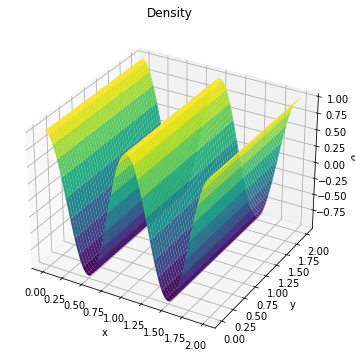

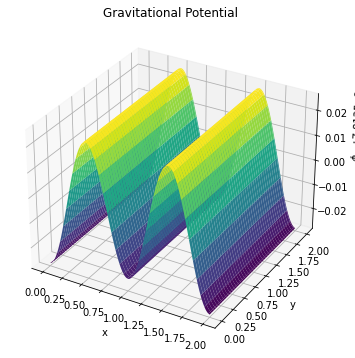

In [3]:
# Define the problem domain and grid spacing
Lx, Ly = 2.0, 2.0
Nx, Ny = 128, 128
n = 10
rho = np.zeros((n,Nx,Ny))
# Define the charge density rho(x,y)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
xx, yy  = np.meshgrid(x, y) 
 
rho[0,:,:] = np.cos(2 * np.pi * xx)
print("shape",rho[0,:,:].shape)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(xx,yy,rho[0,:,:], cmap='viridis')
ax.set_zlabel(r"$\rho$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Density")


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
phi =  fft_solver(rho[0,:,:],Lx,Nx,Ly,Ny,dim = 2)
surf = ax.plot_surface(xx,yy,phi, cmap='viridis')
ax.set_zlabel(r"$\phi$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Gravitational Potential")

In [15]:
def lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = None,comparison =None,animation=None):
    '''
    This function solves the hydrodynamic Eqns in 1D with/without self gravity using LAX methods 
    described above 
    
    
    Input:  Time till the system is integrated :time
            Number of Xgrid points : N
            Courant number : nu
            Wavelength : If lambda> lambdaJ (with gravity--> Instability) else waves propagation 
            Number of waves : The domain size changes with this maintain periodicity
            Density perturbation : rho1 (for linear or non-linear perturbation)
            Gravity:  If True it deploys the FFT routine to estimate the potential 
            isplot(optional): if True plots the output
            Comparison (optional) : If True then the plots are overplotted with LT solutions for comparison
            Animation (optional): Not used at the moment
    
    Output: Density, velocity + (phi and g if gravity is True)
            isplot: True then the plots are generated 
    
    '''
    
    
    # rho_max = []
    lam = lam          # one wavelength
    num_of_waves  = num_of_waves  
    Lx = lam * num_of_waves            # Maximum length (two wavelength)
    Ly = lam * num_of_waves 
    print("at time= ",time)
    ### Declaring the Constants

    c_s = 1.0            # % Sound Speed  
    rho_o = 1.0          # zeroth order density
    nu = nu              # courant number (\nu = 2 in 2d)
    rho_1 = rho_1        # for linear/nonlinear wave propagation
    const =  1           # The actual value is 4*pi
    G = 1.0              # Gravitational Constant

    ### Grid X-Y-T 
    Nx = N                # The grid resolution values2d:N =(10,50,100,500)
    dx = float(Lx/Nx)      # length spacing          
     
    Ny = N               # The grid resolution values2d:N =(10,50,100,500)
    dy = float(Ly/Ny)      # length spacing       
    dt = nu*dx/c_s       # time grid spacing
 

    ## For simplification
    mux = dt/(2*dx)      # is the coefficient in the central differencing Eqs above 
    muy = dt/(2*dy)      # is the coefficient in the central differencing Eqs above
    n = int(time/dt)     # grid points in time
    print("For dx = {} and dt = {} and time gridpoints n = {} ".format(dx,dt,n))
    
    ########### Initializing the ARRAY #######################
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    xx, yy  = np.meshgrid(x, y) ## Mesh for the 2D domain
    rho = np.zeros((n,Nx,Ny))
    vx =np.zeros((n,Nx,Ny)) 
    vy =np.zeros((n,Nx,Ny))
    Px =np.zeros((n,Nx,Ny)) # The flux term  U in the above equations
    Py =np.zeros((n,Nx,Ny)) # The flux term  W in the above equations  
#     print(rho.shape,xx.shape)
    phi = np.zeros((n,Nx,Ny))
#     print("shape of Phi",phi[0,:,:].shape)
        
    ## Calculating the jeans length is gravity is Turned on
    if gravity:
        jeans = np.sqrt(4*np.pi**2*c_s**2/(const*G*rho_o))
        print("Jean's Length",jeans)

    ######################## Initial Conditions ###########################
    rho[0,:,:] = rho_o + rho_1* np.cos(2*np.pi*xx.T/lam) # defing the density at t = 0 EQ 11
#     print(rho_1* np.cos(2*np.pi*x/lam))
    
#     print(rho[0,:,:].shape,yy.shape)
#     print(rho[0,:,:])
#     print(np.roll(rho[0,:,:], -1, axis=0))
#     print(np.roll(rho[0,:,:], -1, axis=1))
#     fig = plt.figure(figsize=(9,6))
#     ax = fig.add_subplot(projection='3d')
#     surf = ax.plot_surface(xx.T,yy.T,rho[0,:,:], cmap='viridis')
    
    
    
    if gravity == False:
        print("Propagation of Sound wave") 
        v_1 = (c_s*rho_1)/rho_o # velocity perturbation
        vx[0,:,:] = v_1 * np.cos(2*np.pi*xx.T/lam) # the velocity at t =0
#         vy[0,:,:] = v_1 * np.cos(2*np.pi*yy.T/lam) # the velocity at t =0
#         vy[0,:,:] = 0
        ## Linear Theory
        if comparison:
            rho_LT  = rho_o + rho_1*np.cos(2*np.pi * x/lam - 2*np.pi/lam *time)
            rho_LT_max = np.max(rho_o + rho_1*np.cos(2*np.pi * x/lam - 2*np.pi/lam *time))
            vx_LT = v_1* np.cos(2*np.pi * x/lam - 2*np.pi/lam *time) 
            vy_LT = np.zeros((Nx))
    
    else:    ######## When self-gravity is True and see EQN 12
        if lam >= jeans:  
            print("There is gravitational instabilty  lam = {} > l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(const*G*rho_o-c_s**2*(2*np.pi/lam)**2)
            v_1  = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) ## With gravity     
            vx[0,:,:] = - v_1 * np.sin(2*np.pi*xx.T/lam) # the velocity at t =0
            # print("initial vy",vy[n-1,1,:])
            ##### Density values from Linear Theory at t 
            if comparison:
                rho_LT = rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam)
                rho_LT_max = np.max(rho_o + rho_1*np.exp(alpha * time)*np.cos(2*np.pi*x/lam))
                vx_LT = -v_1*np.exp(alpha * time)*np.sin(2*np.pi*x/lam)
                vy_LT = np.zeros((Nx))
#             print("rho_theory_max={} and the max density {} at time {}".format(rho_LT_max ,rho_max, round(time,2)))

        else:
            print("There is no gravitational instabilty as lam = {} < l_jean ={}".format(lam,jeans))
            alpha = np.sqrt(c_s**2*(2*np.pi/lam)**2 - const*G*rho_o)
            v_1 = (rho_1/rho_o) * (alpha/(2*np.pi/lam)) # velocity perturbation
            vx[0,:,:] = v_1 * np.cos(2*np.pi*xx/lam) # the velocity at t =0
            if comparison:
                rho_LT = rho_o + rho_1*np.cos(alpha * time - 2*np.pi*x/lam)
                rho_LT_max = np.max(rho_o + rho_1*np.cos(alpha * time - 2*np.pi*x/lam))
                vx_LT = v_1*np.cos(alpha * time - 2*np.pi*x/lam)
                vy_LT = np.zeros((Nx))
        
        ## Calculating the potential and the field using FFT    
#         phi[0,:,:],dphidx,dphidy = fft_solver(const*(rho[0,:,:]-rho_o),Lx,Nx,Ly,Ny,dim = 2)
        phi[0,:,:] = fft_solver(const*(rho[0,:,:]-rho_o),Lx,Nx,Ly,Ny,dim = 2)
#         print("shape of Phi",phi[0,:,:].shape)
#         fft_solver(rho,Lx,nx,Ly,ny,dim = 2)

    ######## The Flux term #########
    Px=rho*vx
    Py=rho*vy
    #################################FINITE DIFFERENCE #######################
    for k in range(1,n): ## Looping over time 

        rho[k,:,:] = (1/4)*(np.roll(rho[k-1,:,:], -1, axis=0)+ np.roll(rho[k-1,:,:], 1, axis=0)\
                          +np.roll(rho[k-1,:,:], -1, axis=1)+ np.roll(rho[k-1,:,:], 1, axis=1))\
        -(mux*(np.roll(rho[k-1,:,:],-1,axis=0)*np.roll(vx[k-1,:],-1,axis=0)-np.roll(rho[k-1,:],1, axis=0)*np.roll(vx[k-1,:],1,axis=0)))\
        -(muy*(np.roll(rho[k-1,:,:],-1,axis=1)*np.roll(vy[k-1,:],-1,axis=1)-np.roll(rho[k-1,:],1, axis=1)*np.roll(vy[k-1,:],1,axis=1)))
#         fig = plt.figure(figsize=(9,6))
#         ax = fig.add_subplot(projection='3d')
#         surf = ax.plot_surface(xx.T,yy.T,rho[0,:,:], cmap='viridis')
        if gravity == False: ## Hydro sound wave when gravity is absent  
            
            Px[k,:,:] = 0.25*(np.roll(Px[k-1,:,:],-1,axis=0)+ np.roll(Px[k-1,:,:],1,axis=0) + np.roll(Px[k-1,:,:],-1,axis=1)+ np.roll(Px[k-1,:,:],1,axis=1))\
            -(mux*(np.roll(Px[k-1,:,:],-1,axis=0)*np.roll(vx[k-1,:,:],-1,axis=0)- np.roll(Px[k-1,:,:],1,axis=0)*np.roll(vx[k-1,:,:],1,axis=0)))\
            -(muy*(np.roll(Px[k-1,:,:],-1,axis=1)*np.roll(vy[k-1,:,:],-1,axis=1)- np.roll(Px[k-1,:,:],1,axis=1)*np.roll(vy[k-1,:,:],1,axis=1)))\
            -((c_s**2)*mux*(np.roll(rho[k-1,:,:],-1,axis=0)- np.roll(rho[k-1,:,:],1,axis=0)))

            Py[k,:,:] = 0.25*(np.roll(Py[k-1,:,:],-1,axis=0)+ np.roll(Py[k-1,:,:],1,axis=0) + np.roll(Py[k-1,:,:],-1,axis=1)+ np.roll(Py[k-1,:,:],1,axis=1))\
            -(muy*(np.roll(Py[k-1,:,:],-1,axis=1)*np.roll(vy[k-1,:,:],-1,axis=1)- np.roll(Py[k-1,:,:],1,axis=1)*np.roll(vy[k-1,:,:],1,axis=1)))\
            -(mux*(np.roll(Py[k-1,:,:],-1,axis=0)*np.roll(vx[k-1,:,:],-1,axis=0)- np.roll(Py[k-1,:,:],1,axis=0)*np.roll(vx[k-1,:,:],1,axis=0)))\
            -((c_s**2)*muy*(np.roll(rho[k-1,:,:],-1,axis=1)- np.roll(rho[k-1,:,:],1,axis=1)))

             
        else: ## With self-gravity activated 
            Px[k,:,:] = 0.25*(np.roll(Px[k-1,:,:],-1,axis=0)+ np.roll(Px[k-1,:,:],1,axis=0) + np.roll(Px[k-1,:,:],-1,axis=1)+ np.roll(Px[k-1,:,:],1,axis=1))\
            -(mux*(np.roll(Px[k-1,:,:],-1,axis=0)*np.roll(vx[k-1,:,:],-1,axis=0)- np.roll(Px[k-1,:,:],1,axis=0)*np.roll(vx[k-1,:,:],1,axis=0)))\
            -(muy*(np.roll(Px[k-1,:,:],-1,axis=1)*np.roll(vy[k-1,:,:],-1,axis=1)- np.roll(Px[k-1,:,:],1,axis=1)*np.roll(vy[k-1,:,:],1,axis=1)))\
            -((c_s**2)*mux*(np.roll(rho[k-1,:,:],-1,axis=0)- np.roll(rho[k-1,:,:],1,axis=0)))\
            -(mux*rho[k-1,:,:]*(np.roll(phi[k-1,:,:],-1,axis=0)- np.roll(phi[k-1,:,:],1,axis=0)))

            Py[k,:,:] = 0.25*(np.roll(Py[k-1,:,:],-1,axis=0)+ np.roll(Py[k-1,:,:],1,axis=0) + np.roll(Py[k-1,:,:],-1,axis=1)+ np.roll(Py[k-1,:,:],1,axis=1))\
            -(muy*(np.roll(Py[k-1,:,:],-1,axis=1)*np.roll(vy[k-1,:,:],-1,axis=1)- np.roll(Py[k-1,:,:],1,axis=1)*np.roll(vy[k-1,:,:],1,axis=1)))\
            -(mux*(np.roll(Py[k-1,:,:],-1,axis=0)*np.roll(vx[k-1,:,:],-1,axis=0)- np.roll(Py[k-1,:,:],1,axis=0)*np.roll(vx[k-1,:,:],1,axis=0)))\
            -((c_s**2)*muy*(np.roll(rho[k-1,:,:],-1,axis=1)- np.roll(rho[k-1,:,:],1,axis=1)))\
            -(muy*rho[k-1,:,:]*(np.roll(phi[k-1,:,:],-1,axis=1)- np.roll(phi[k-1,:,:],1,axis=1)))

  
#             phi[k,:],dphidx[k,:] = fft_solver(const*(rho[k,:]-rho_o),L,N, dim = None) ## Please note we don't use dphidx rather calculate using central differencing
#             fig = plt.figure(figsize=(9,6))
#             ax = fig.add_subplot(projection='3d')
#             surf = ax.plot_surface(xx.T,yy.T,phi[0,:,:], cmap='viridis')
            phi[k,:,:]= fft_solver(const*(rho[k,:,:]-rho_o),Lx,Nx,Ly,Ny,dim = 2)

        vx[k,:,:] = Px[k,:,:]/rho[k,:,:] ## 2-D velocity vx 
        vy[k,:,:] = Py[k,:,:]/rho[k,:,:] ## 2-D velocity vy
        # print(vy[n-1,1,:])
    rho_max = np.max(rho)   ## Maximum density from the FD calculation 
    
    
    ################################# PLOTTING #######################
 
    if isplot : 
        plt.figure(1,figsize=(6,4))
        plt.plot(x,rho[n-1,:,5]-rho_o,linewidth=1,label="FD at t={}".format(round(time,2)))
#         plt.plot(x,rho[n-1,5,:]-rho_o,linewidth=1,label="FD at t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        # plt.text(.6,.15,r"dt=%f"%(dt),fontsize=12)
        plt.title("At time {} and rho_1 = {}".format(time,rho_1))
        plt.ylabel(r"$\mathbf{\rho - \rho_{0}}$")
        if comparison : 
            plt.plot(x,rho_LT-rho_o,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)

        plt.figure(2,figsize=(6,4))
        plt.plot(x,vx[n-1,:,5],'--',markersize=2,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{x}$")
        plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
        plt.ylabel("vx")        
        if comparison : 
            plt.plot(x,vx_LT,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True) 
            
        plt.figure(3,figsize=(6,4))
        plt.plot(y,vy[n-1,1,:],'--',markersize=2,label="t={}".format(round(time,2)))
        plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
        plt.xlabel(r"$\mathbf{y}$")
        plt.title(r"Lax Solution Velocity For $\rho_1$ = {}".format(rho_1))
        plt.ylabel("vy")
        if comparison : 
            plt.plot(y,vy_LT,'--',linewidth=1,label="LT")
            plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)

        if gravity:
             #### Plotting the comparison of the \rho_max for FD and Linear Theory 
            
#             plt.figure(3,figsize=(6,4))                                
#             plt.scatter(time,rho_max,label="FD")
                    
#             plt.xlabel("t")
#             plt.ylabel(r"$\log (\rho_{\rm max} - \rho_{0}) $")
#             plt.yscale('log')
#             plt.legend(numpoints=1,loc='best',fancybox=True,shadow=True)
#             if comparison:
#                 plt.scatter(time,rho_LT_max,facecolors='none', edgecolors='r',label="LT")   
#                 plt.legend(numpoints=1,loc='best',fancybox=True,shadow=True)

            ## Plotting the gravitational potential (\phi) and field (g)
            plt.figure(4,figsize=(6,4))
            plt.plot(x,phi[n-1,:,:],'--',markersize=2,label="t=phi at {}".format(round(time,2)))

            plt.xlabel(r"$\mathbf{x}$")
            plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
            plt.ylabel(r"$\Phi$")

#             plt.figure(5,figsize=(6,4))
# #                 plt.plot(x,phi[n-1,:],'--',markersize=2,label="t=phi at {}".format(time))
#             plt.plot(x,dphidx[n-1,:,:],'--',markersize=2,label="g at t={}".format(round(time,2)))
# #             plt.legend(numpoints=1,loc='upper right',fancybox=True,shadow=True)
#             plt.xlabel(r"$\mathbf{x}$")
#             plt.title(r"Lax Solution Phi For $\rho_1$ = {}".format(rho_1))
#             plt.ylabel(r"$g$")

#     else:
#         if gravity:
#             return x,rho,v,phi,dphidx,n,rho_LT,rho_LT_max,rho_max,v_LT
#         else:
#             return x,rho,v,rho_LT,rho_LT_max,rho_max,v_LT
            
#     ## Clearing the memory
    del rho, phi, vx,vy, Px,Py

at time=  1.0
For dx = 0.014 and dt = 0.007 and time gridpoints n = 142 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
Total time = 30.83223271369934 sec for N= 1000


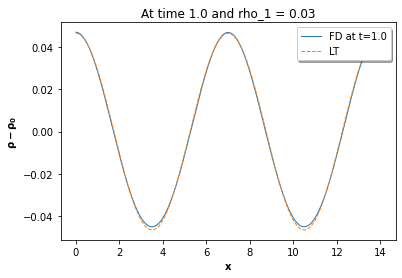

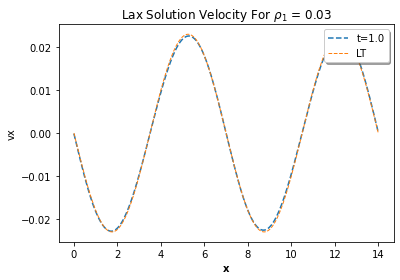

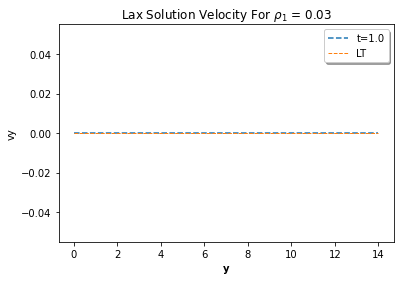

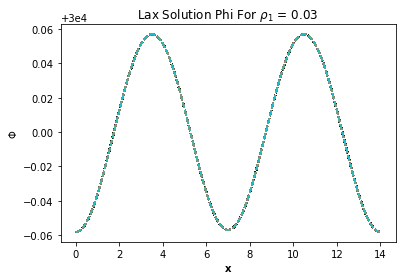

In [16]:

lam = 7.0           # one wavelength
num_of_waves = 2    # the number of waves
rho_1 = 0.03;       # perturbation strength
nu = 0.5            # COURANT number
N = 1000            # number of grid points


t = 1.0

import time

start = time.time()


## Wihout Gravity
# lax_solution(t,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = True,comparison = True,animation=None)
## With Gravity
lax_solution(t,N,nu,lam,num_of_waves,rho_1,gravity=True,isplot = True,comparison = True,animation=None)


# print("hello")
end = time.time()
print("Total time = {} sec for N= {}".format(end - start,N))


## To check the time evolution 

at time=  0.5
For dx = 0.14 and dt = 0.07 and time gridpoints n = 7 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
at time=  1.5
For dx = 0.14 and dt = 0.07 and time gridpoints n = 21 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586
at time=  2.5
For dx = 0.14 and dt = 0.07 and time gridpoints n = 35 
Jean's Length 6.283185307179586
There is gravitational instabilty  lam = 7.0 > l_jean =6.283185307179586


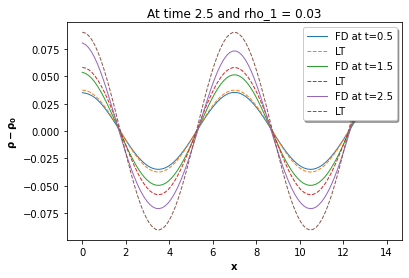

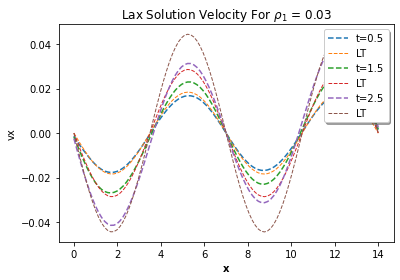

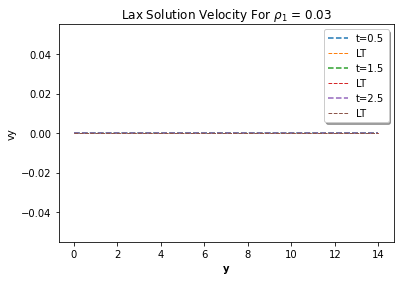

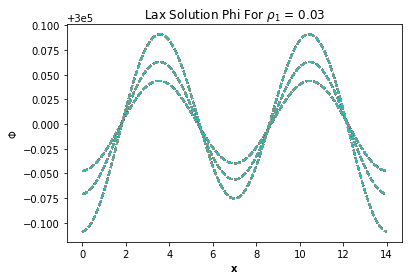

In [17]:
N = 100            # number of grid points
time_array = np.asarray([0.5,1.5,2.5])
for time in time_array:
    # lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=False,isplot = True,comparison = True,animation=None)
    lax_solution(time,N,nu,lam,num_of_waves,rho_1,gravity=True,isplot = True,comparison = True,animation=None)